# Bilag 3 - Model Output

In [97]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Tilføj biblioteket et niveau over til sys.path
HELPERS_PATH = os.path.abspath("..")
if not HELPERS_PATH in sys.path:
    sys.path.append(HELPERS_PATH)
    
from Helpers.GeneralHelpers import *
from DataHandling.PreProcessing import *

In [99]:
IMAGE_PATH = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/color")

Vi vælger et punkt, for at illustrere hvordan dette benyttes.

In [100]:
SIM_X = 145
SIM_Y = 145

Vi vælger en enkelt sample.

In [101]:
samples = get_all_samples(IMAGE_PATH, sample_type='png')

# Tilfældig sample
sample = np.random.choice(samples)
print(f"Sample: {sample}")

Sample: 40482


Indlælser denne.

In [102]:
im = load_image(IMAGE_PATH, sample)

og viser det.

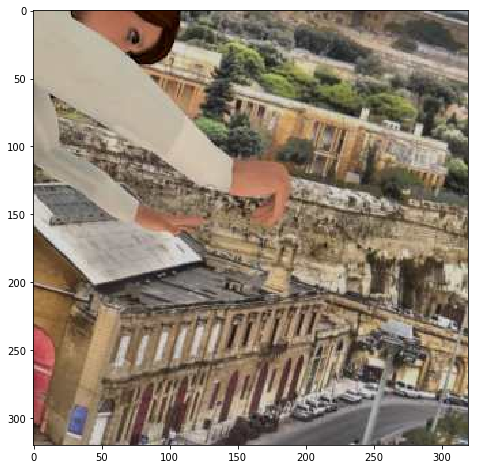

In [103]:
f = plt.figure(figsize=(10, 8))
plt.imshow(im)

Vi generere nu et anker gitter.

In [104]:
anchors = get_anchors(320, 320, 20, 20)

Og plotter disse ankrer på billedet, så vi kan se hvor de ligger.

In [105]:
im_with_anchors = np.copy(im)
for ix in range(anchors.shape[0]):
    for iy in range(anchors.shape[1]):
        a = anchors[ix, iy].astype(np.int32)
        
        cv2.circle(im_with_anchors, (a[0], a[1]), 1, (0, 0, 255), thickness=2)

Vi plotter det valgte punkt med rødt.

In [106]:
#c = cv2.circle(im_with_anchors, (SIM_X, SIM_Y), 1, (255, 0, 0), thickness=2)

Og viser billedet igen, så vi kan se hvor det er.

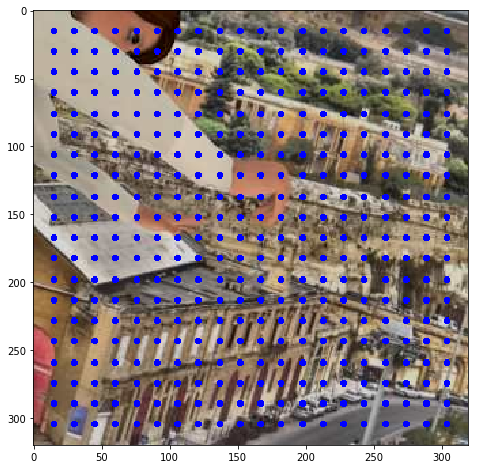

In [107]:
f = plt.figure(figsize=(10, 8))
plt.imshow(im_with_anchors)

Vi ønsker så, dels at finde det anker punkt der er tættest på, og dels at finde afstanden fra dette anker punkt til det punkt vi leder efter.

Først tager vi x og y værdier fra vores anker gitter.

In [108]:
xs = anchors[:, :, 0]
ys = anchors[:, :, 1]

Laver en matrix der indeholder afstande fra anker punkter til det punkt vi leder efter.

In [109]:
dist_matrix = np.sqrt( (xs - SIM_X)**2 + (ys - SIM_Y)**2 )

Vi kan så finde indexer til det anker punkt der er tættest på.

In [110]:
closest_xs, closest_ys = np.where(dist_matrix<=np.min(dist_matrix))

Grundet det format np.where giver os, bruges der et loop til at fined anker punktet, markere det med grønt, og beregne offset x og y værdier.

In [111]:
for cx, cy in zip(closest_xs, closest_ys):
    pic_x, pic_y = anchors[cx, cy]
    c = cv2.circle(im_with_anchors, (int(pic_x), int(pic_y)),
                   1,
                   (0, 255, 0),
                   thickness=2)

    offset_x = (SIM_X - pic_x)
    offset_y = (SIM_Y - pic_y)
    
    print(f"Offset x værdi: {offset_x}")
    print(f"Offest y værdi: {offset_y}")

Offset x værdi: -7.0
Offest y værdi: -7.0


Resultatet er så

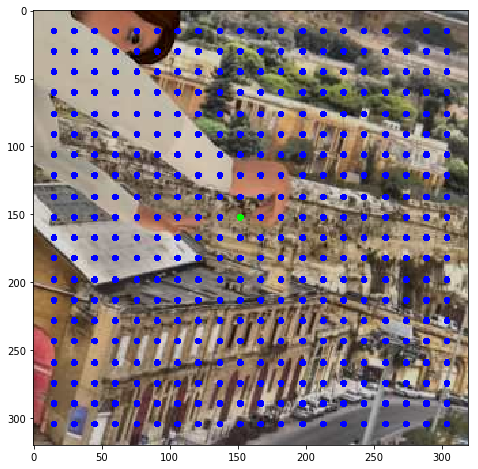

In [112]:
f = plt.figure(figsize=(10, 8))
plt.imshow(im_with_anchors)